In [1]:
data=!unzip Dataset.zip

In [2]:
from tensorflow.keras.layers import Input,Dense,Lambda,Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
IMAGE_SIZE=[224,224]

train_path='/content/Dataset/Train'
test_path='/content/Dataset/Test'

In [5]:
vgg19=VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

80142336/80134624 [==============================] - 0s 0us/step


In [6]:
for layer in vgg19.layers:
  layer.trainable=False

In [7]:
folders =glob('/content/Dataset/Train/*')
folders

['/content/Dataset/Train/Parasite', '/content/Dataset/Train/Uninfected']

In [8]:
len(folders)

2

In [9]:
x=Flatten()(vgg19.output)

In [10]:
prediction=Dense(len(folders),activation='softmax')(x)

model=Model(inputs=vgg19.input,outputs=prediction)

In [11]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [14]:
train_set=train_datagen.flow_from_directory('/content/Dataset/Train',target_size=[224,224],batch_size=32,class_mode='categorical')

Found 416 images belonging to 2 classes.


In [15]:
test_set=test_datagen.flow_from_directory('/content/Dataset/Test',target_size=[224,224],class_mode='categorical')

Found 134 images belonging to 2 classes.


In [16]:
r=model.fit(train_set,validation_data=test_set,epochs=50,steps_per_epoch=len(train_set),validation_steps=len(test_set))

Epoch 1/50
13/13 [==============================] - 329s 25s/step - loss: 1.4317 - accuracy: 0.5553 - val_loss: 0.7928 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 333s 26s/step - loss: 0.7496 - accuracy: 0.6226 - val_loss: 1.1912 - val_accuracy: 0.4328
Epoch 3/50
13/13 [==============================] - 330s 25s/step - loss: 0.5045 - accuracy: 0.7452 - val_loss: 0.4490 - val_accuracy: 0.7388
Epoch 4/50
13/13 [==============================] - 329s 25s/step - loss: 0.3666 - accuracy: 0.8486 - val_loss: 0.4284 - val_accuracy: 0.7761
Epoch 5/50
13/13 [==============================] - 328s 25s/step - loss: 0.3276 - accuracy: 0.8750 - val_loss: 0.3614 - val_accuracy: 0.8358
Epoch 6/50
13/13 [==============================] - 346s 27s/step - loss: 0.3018 - accuracy: 0.8798 - val_loss: 0.3440 - val_accuracy: 0.8657
Epoch 7/50
13/13 [==============================] - 330s 25s/step - loss: 0.2694 - accuracy: 0.8990 - val_loss: 0.3452 - val_accuracy: 0.8806
Epoch 

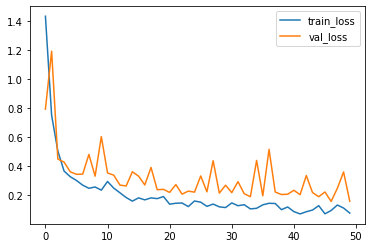

In [17]:
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [18]:
y_pred=model.predict(test_set)

In [19]:
y_pred=np.argmax(y_pred,axis=1)

In [57]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1])

In [69]:
y=image.load_img('/content/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163029_cell_166.png',target_size=(224,224))
y=image.img_to_array(y)
y=y/255
y=np.expand_dims(y,axis=0)
y=preprocess_input(y)
y.shape

(1, 224, 224, 3)

In [70]:
p2=np.argmax(model.predict(y),axis=1)

In [71]:
p2

array([1])